<a href="https://colab.research.google.com/github/Ramyasmg/Machine-learning-Internship/blob/master/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:

import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# Loading the CSV file into a pandas dataframe.
df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [17]:
df.shape


(11914, 16)

In [18]:
df.describe()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [19]:
print(df.isnull().sum())


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [26]:
df = df.drop(['Model','Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [28]:
#Renaming Columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(6)

,Make,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200


In [29]:
#Removing Duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (801, 12)


In [33]:
df = df.drop_duplicates()
df.head(5)
df.shape

(11113, 12)

In [34]:
#Droping null values
print(df.isnull().sum())

Make              0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [36]:
# Dropping the missing values.
df = df.dropna()    
df.count()
print(df.isnull().sum())

Make             0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


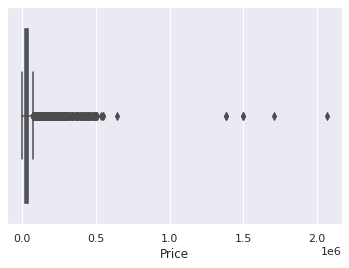

In [37]:
#Checking for outliers
sns.boxplot(x=df['Price'])

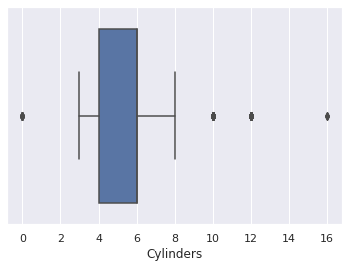

In [38]:
sns.boxplot(x=df['Cylinders'])

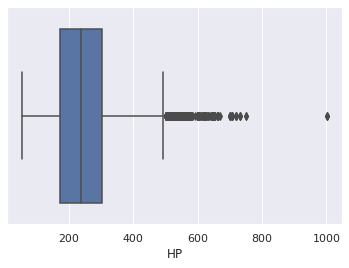

In [39]:
sns.boxplot(x=df['HP'])


In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21452.5
dtype: float64


In [41]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8543, 12)

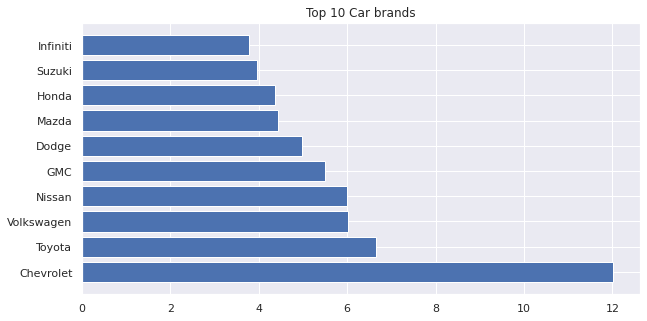

In [42]:
#finding car brands thar are most represented
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [44]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)


                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


In [45]:
#Plotting Correlation matrix
df.corr()


,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325205,-0.106320,0.373609,0.335121,0.199807,0.590797
HP,0.325205,1.000000,0.734182,-0.453474,-0.554869,0.095051,0.746144
Cylinders,-0.106320,0.734182,1.000000,-0.691401,-0.746340,0.013596,0.389618
MPG-H,0.373609,-0.453474,-0.691401,1.000000,0.937008,0.092970,-0.121428
MPG-C,0.335121,-0.554869,-0.746340,0.937008,1.000000,0.080868,-0.197850
Popularity,0.199807,0.095051,0.013596,0.092970,0.080868,1.000000,0.112799
Price,0.590797,0.746144,0.389618,-0.121428,-0.197850,0.112799,1.000000


High correlation between

Cylinders & HP


highway mpg & City mpg

The more cylinders there are, the more powerful the car is

Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.

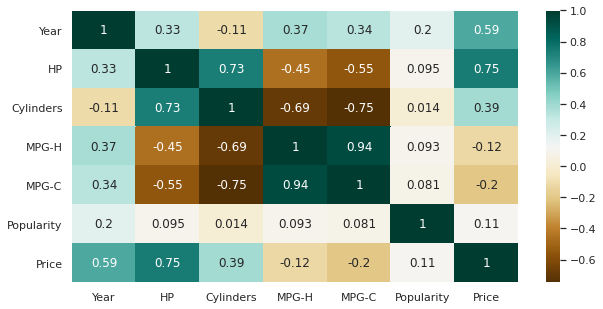

In [46]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line

KeyError: ignored

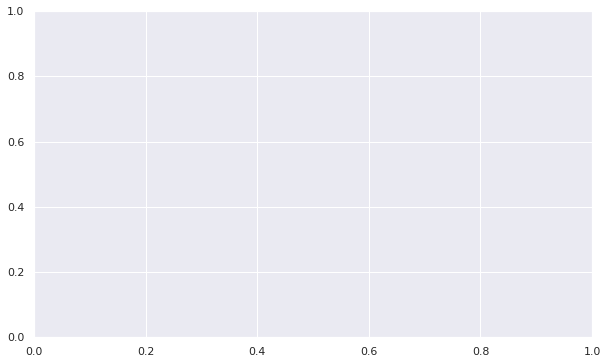

In [49]:
#Scatter Plots
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()